In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

Numpy loadtxt enables you to load numeric data that's stored in a text file. So, for example, if you have row-and-column data that's stored in a text file, where the numbers are separated by commas (a so-called csv file), you can use Numpy loadtxt to load the data into your Python environment.

In [3]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')
x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [4]:
print('x_train --> ',x_train.shape)
print('y_train --> ',y_train.shape)
print('x_test --> ',x_test.shape)
print('y_test --> ',y_test.shape)

x_train -->  (2000, 30000)
y_train -->  (2000,)
x_test -->  (400, 30000)
y_test -->  (400,)


In [5]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [6]:
print('x_train --> ',x_train.shape)
print('y_train --> ',y_train.shape)
print('x_test --> ',x_test.shape)
print('y_test --> ',y_test.shape)

x_train -->  (2000, 100, 100, 3)
y_train -->  (2000, 1)
x_test -->  (400, 100, 100, 3)
y_test -->  (400, 1)


In [7]:
###Scaling the values between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

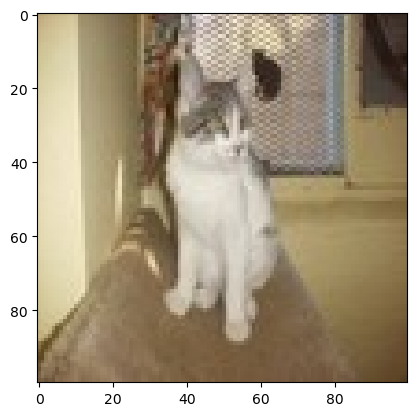

In [8]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

#len(x_train) -> 2000
#random.randint(0,2000) -> generates a random number between 0 and 2000
#plt.imshow() -> Display data as an image, i.e., on a 2D regular raster.
#x_train[370,:] -> displays values in 370th row all columns

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Anutthamaa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [12]:
model.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.4890 - loss: 0.7000 - val_accuracy: 0.5750 - val_loss: 0.6897
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5733 - loss: 0.6805 - val_accuracy: 0.6250 - val_loss: 0.6544
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6891 - loss: 0.5922 - val_accuracy: 0.6525 - val_loss: 0.6349
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7627 - loss: 0.4827 - val_accuracy: 0.6250 - val_loss: 0.7220
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8167 - loss: 0.4024 - val_accuracy: 0.6900 - val_loss: 0.6730
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8891 - loss: 0.2729 - val_accuracy: 0.6550 - val_loss: 0.8043
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9218 - loss: 0.1988 - val_accuracy: 0.6325 - val_loss: 1.0948
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9695 - loss: 0.0987 - val_accu

In [13]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7055 - loss: 1.4628


[1.6385022401809692, 0.6600000262260437]

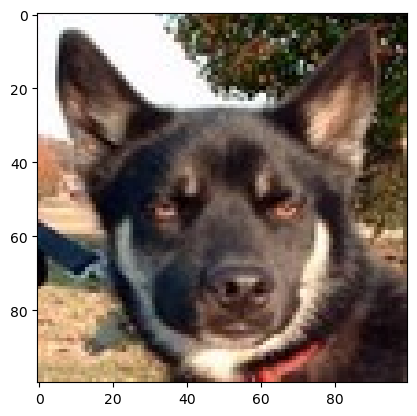

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
It is a Dog


In [14]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1, 100,100,3))
y_pred = y_pred > 0.5

if y_pred == 0:
    print('It is a Dog')
else:
    print('It is a Cat')